# Data Analysis Python Project - Blinkit Analysis 

### 1.Import libraries

In [80]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Import the dataset

In [134]:
df = pd.read_csv("blinkit_data.csv")

### 3.Sample Data

In [16]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


#### 4.Count of (Rows,Column)

In [135]:
df.shape

(8523, 12)

#### 5. Field informations

In [136]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### 6. Field Datatypes

In [137]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## 7.Data Cleaning 

####  finding missing values

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# There are NULL values in item weight so we will fix this

#### Fixing NULL values

In [139]:
df['Item Weight']=df.groupby('Item Type')['Item Weight'].transform(lambda x:x.fillna(x.mean()))

In [140]:
df['Item Weight']

0       15.100000
1       11.800000
2       13.850000
3       12.150000
4       19.600000
          ...    
8518    13.142314
8519    12.987880
8520    11.847460
8521    13.426069
8522    12.987880
Name: Item Weight, Length: 8523, dtype: float64

#### Check any missing values Left

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# clearly we are seeing there is no missing values

####  Finding unique values in first column

In [34]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


####  Fix inconsistent Entries

In [142]:
df['Item Fat Content']= df['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'
    
})

In [143]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [144]:
print(df['Outlet Size'].unique())

['Medium' 'Small' 'High']


In [111]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,Low Fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [44]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

### 8. Exploring Basic stats

In [141]:
# Summary of numerical data
df.describe()


,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857890,140.992782,3.965857
std,8.371760,0.051598,4.232804,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,9.310000,93.826500,4.000000
50%,2012.000000,0.053931,12.867061,143.012800,4.000000
75%,2017.000000,0.094585,16.000000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [145]:
# Count of items per Item Type
df['Item Type'].value_counts()

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

#### Filtering the Warnings

In [48]:
import warnings


In [49]:
warnings.filterwarnings('ignore')


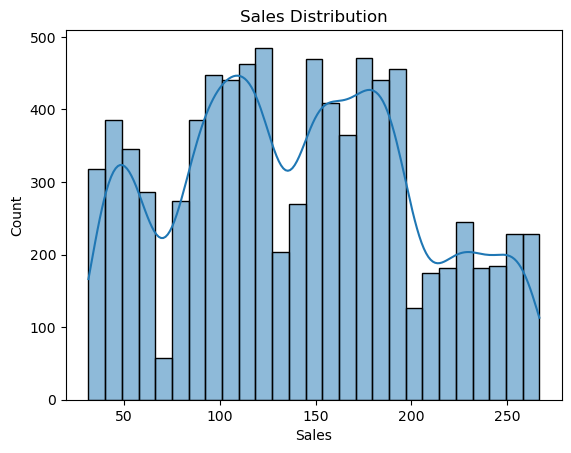

In [52]:
# Sales distribution
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

### KPI's Requirements(for Buisness  requirements)

### Total item sales by Item type

In [146]:
Item_sales=df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

In [57]:
Item_sales

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64

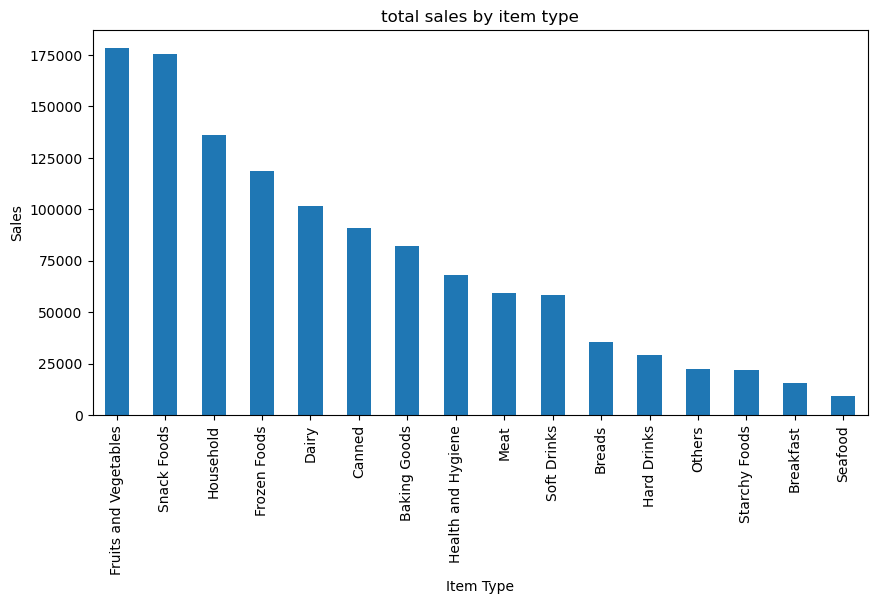

In [59]:
item_sales.plot(kind='bar',figsize=(10,5),title='total sales by item type')
plt.ylabel('Sales')
plt.show()

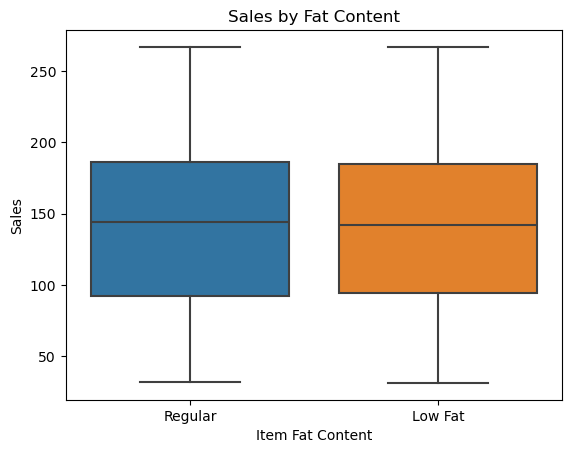

In [61]:
sns.boxplot(x='Item Fat Content', y='Sales', data=df)
plt.title("Sales by Fat Content")
plt.show()

In [147]:
total_sales = df['Sales'].sum()

In [79]:
print(f"total_sales : ₹ {total_sales:,.0f}")

total_sales : ₹ 1,201,681


In [84]:
average_sales=df['Sales'].mean()
print("Average sales :",average_sales)

Average sales : 140.9927819781767


In [100]:
No_of_item_sold=df["Sales"].count()
print(f" Total item sales:  {No_of_item_sold:,.0f}")

 Total item sales:  8,523


In [101]:
average_rating = df["Rating"].mean()
print(f"Average_ratings :  {average_rating:,.0f}")

Average_ratings :  4


### 1. Total Sales by Fat Content:

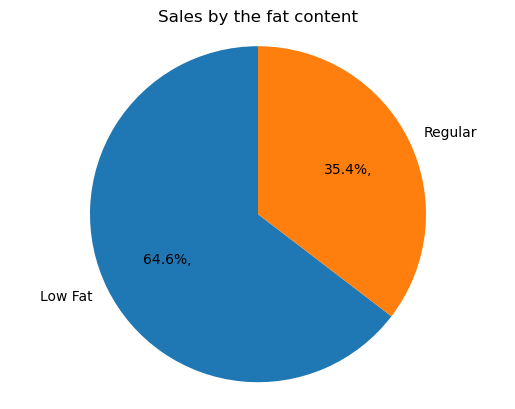

In [151]:
sales_by_fat=df.groupby("Item Fat Content")['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%.1f%%,',startangle=90)
plt.title('Sales by the fat content')
plt.axis("equal")
plt.show()

### Additional KPI Metrics: 

In [152]:
kpis=df.groupby("Item Fat Content").agg(
    total_sales=('Sales','sum'),
    average_sales=('Sales','mean'),
    number_of_items=('Item Identifier','count'),
    average_rating=('Rating','mean')
).reset_index()

In [153]:
kpis

,Item Fat Content,total_sales,average_sales,number_of_items,average_rating
0,Low Fat,776319.6784,140.714098,5517,3.966286
1,Regular,425361.8024,141.504259,3006,3.965070


### 2. Total Sales by Item Type:


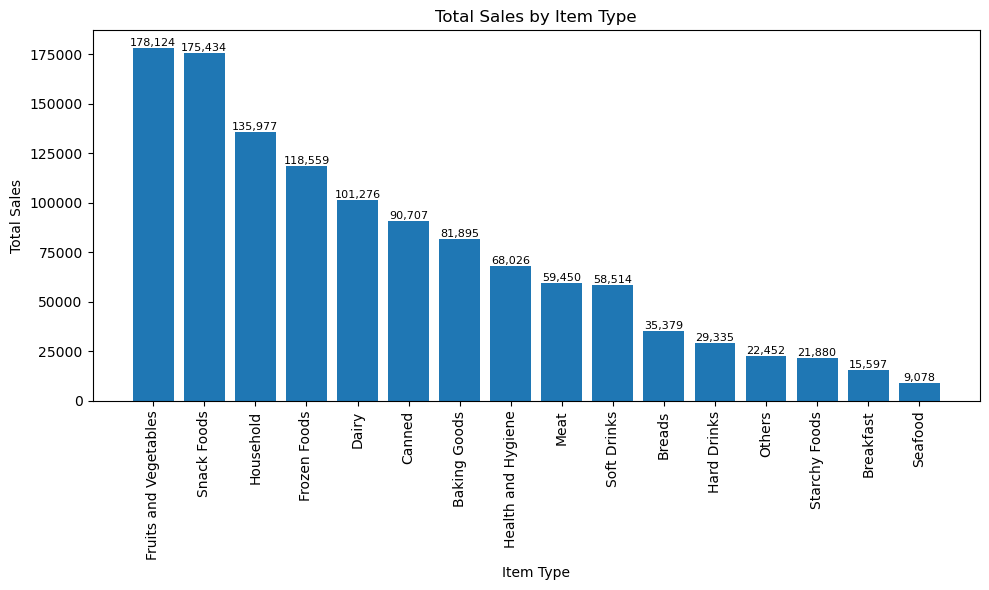

In [154]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()


### 3. Fat Content by Outlet for Total Sales:


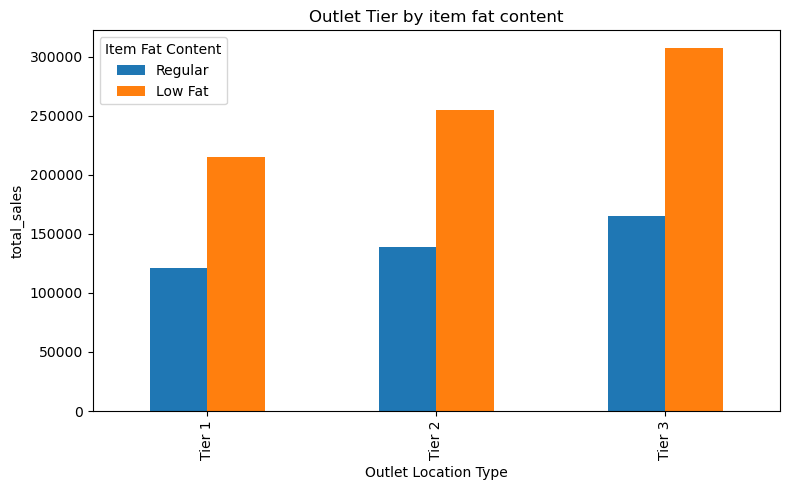

In [155]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by item fat content')
plt.xlabel('Outlet Location Type')
plt.ylabel('total_sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()



### 4. Total Sales by Outlet Establishment:

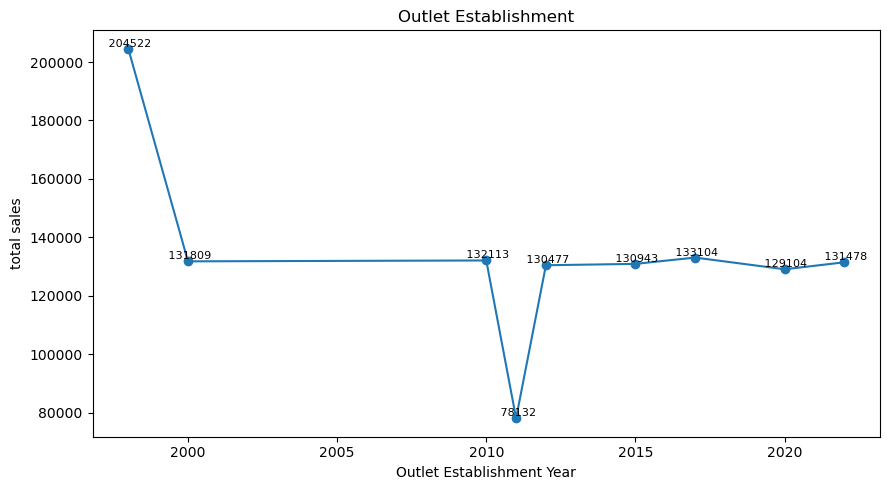

In [157]:
sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

plt.xlabel("Outlet Establishment Year")
plt.ylabel("total sales")
plt.title("Outlet Establishment")

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f"{y: .0f}",ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

### 5. Sales by Outlet Size:

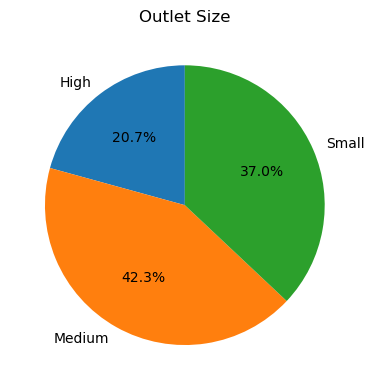

In [160]:
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels =sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title("Outlet Size")
plt.tight_layout()
plt.show()

### 6. Sales by Outlet Location:

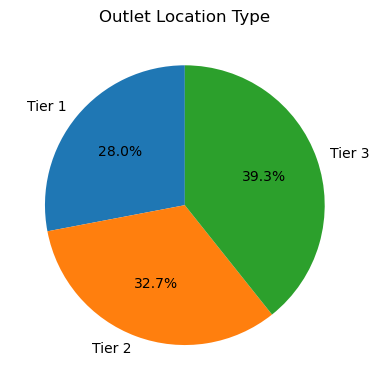

In [162]:
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels =sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title("Outlet Location Type")
plt.tight_layout()
plt.show()

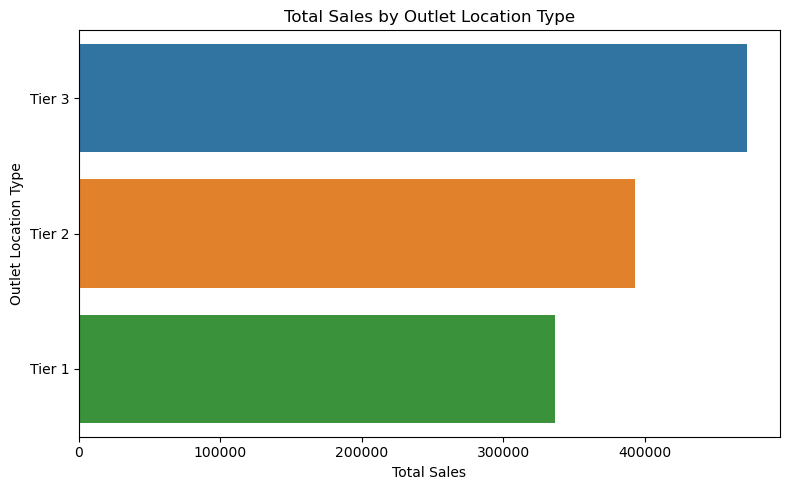

In [163]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()

sales_by_location = sales_by_location.sort_values('Sales', ascending=False)
plt.figure(figsize=(8, 5)) 
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()
